# Uber Pickup Data Analysis for April 2014 

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('ggplot')

In [15]:
df_apr=pd.read_csv('uber-raw-data-apr14.csv')

## Data Preprocessing 

In [16]:
df_apr.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [17]:
df_apr.shape

(564516, 4)

In [18]:
df_apr.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


Converting column 'Date/Time' from string to datetime

In [19]:
type(df_apr.iloc[0,0])

str

In [20]:
df_apr['Date/Time']=pd.to_datetime(df_apr['Date/Time'],format='%m/%d/%Y %H:%M:%S')

In [21]:
type(df_apr.iloc[0,0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
df_apr.head(10)

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512
5,2014-04-01 00:33:00,40.7383,-74.0403,B02512
6,2014-04-01 00:39:00,40.7223,-73.9887,B02512
7,2014-04-01 00:45:00,40.7620,-73.9790,B02512
8,2014-04-01 00:55:00,40.7524,-73.9960,B02512
9,2014-04-01 01:01:00,40.7575,-73.9846,B02512


Replacing Date/Time with more suitable columns

In [22]:
df_apr['date']=df_apr['Date/Time'].dt.day
df_apr['weekday']=df_apr['Date/Time'].dt.day_name()
df_apr['hour']=df_apr['Date/Time'].dt.hour
df_apr['min']=df_apr['Date/Time'].dt.minute
df_apr['weekno']=df_apr['Date/Time'].dt.weekofyear - 13

In [23]:
df_apr=df_apr.drop(['Date/Time'],axis=1)

In [24]:
df_apr.head(10)

,Lat,Lon,Base,date,weekday,hour,min,weekno
0,40.7690,-73.9549,B02512,1,Tuesday,0,11,1
1,40.7267,-74.0345,B02512,1,Tuesday,0,17,1
2,40.7316,-73.9873,B02512,1,Tuesday,0,21,1
3,40.7588,-73.9776,B02512,1,Tuesday,0,28,1
4,40.7594,-73.9722,B02512,1,Tuesday,0,33,1
5,40.7383,-74.0403,B02512,1,Tuesday,0,33,1
6,40.7223,-73.9887,B02512,1,Tuesday,0,39,1
7,40.7620,-73.9790,B02512,1,Tuesday,0,45,1
8,40.7524,-73.9960,B02512,1,Tuesday,0,55,1
9,40.7575,-73.9846,B02512,1,Tuesday,1,1,1


In [25]:
df_apr.tail(10)

,Lat,Lon,Base,date,weekday,hour,min,weekno
564506,40.7316,-73.9891,B02764,30,Wednesday,23,0,5
564507,40.7267,-73.9937,B02764,30,Wednesday,23,4,5
564508,40.7788,-73.9600,B02764,30,Wednesday,23,5,5
564509,40.7420,-74.0037,B02764,30,Wednesday,23,15,5
564510,40.7514,-74.0066,B02764,30,Wednesday,23,18,5
564511,40.7640,-73.9744,B02764,30,Wednesday,23,22,5
564512,40.7629,-73.9672,B02764,30,Wednesday,23,26,5
564513,40.7443,-73.9889,B02764,30,Wednesday,23,31,5
564514,40.6756,-73.9405,B02764,30,Wednesday,23,32,5
564515,40.6880,-73.9608,B02764,30,Wednesday,23,48,5


Checking for null values

In [38]:
df_apr.isnull().sum()

Lat        0
Lon        0
Base       0
date       0
weekday    0
hour       0
min        0
weekno     0
dtype: int64

There are no null values in the dataset

## Analyzing Data 

### 1) Analyzing by Weekday

Total number of Uber pickups on each day over the month 

In [73]:
week_day=pd.DataFrame(df_apr['weekday'].value_counts())
week_day

,weekday
Wednesday,108631
Tuesday,91185
Friday,90303
Thursday,85067
Saturday,77218
Monday,60861
Sunday,51251


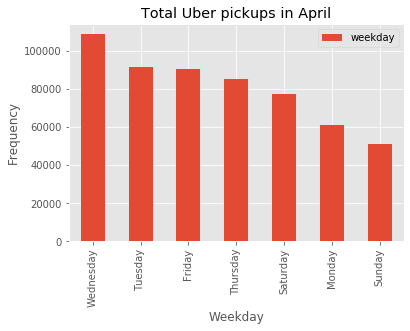

In [74]:
week_day.plot.bar()
plt.title('Total Uber pickups in April')
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.show()

Average Uber pickups per week

In [75]:
week_day=week_day/4

In [76]:
week_day

,weekday
Wednesday,27157.75
Tuesday,22796.25
Friday,22575.75
Thursday,21266.75
Saturday,19304.50
Monday,15215.25
Sunday,12812.75


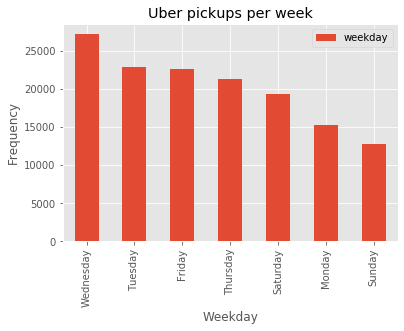

In [77]:
week_day.plot.bar()
plt.title('Uber pickups per week')
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.show()

As observed, Wednesday and Tuesdays have the maximum frequency of Uber pickups whereas Sunday is the least busiest. 

Weekends vs Weekdays : Difference in average number of pickups on weekdays and weekends

In [78]:
week_day['day_type']=['wd','wd','wd','wd','we','wd','we']

In [79]:
week_day

,weekday,day_type
Wednesday,27157.75,wd
Tuesday,22796.25,wd
Friday,22575.75,wd
Thursday,21266.75,wd
Saturday,19304.50,we
Monday,15215.25,wd
Sunday,12812.75,we


In [82]:
pie=week_day.groupby('day_type').sum()
pie.iloc[0,0]=pie.iloc[0,0]/5
pie.iloc[1,0]=pie.iloc[1,0]/2
pie

,weekday
day_type,
wd,21802.350
we,16058.625


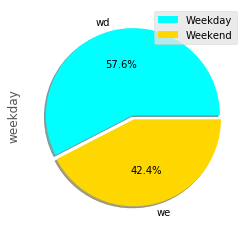

In [153]:
explode=[0,0.05]
colors=['cyan','gold']
labels=['Weekday','Weekend']
pie.plot.pie(autopct = '%1.1f%%',shadow=True,subplots=True,
        colors=colors,explode=explode)
plt.legend(labels=labels)
plt.show()

The average pickups on weekdays is higher than weekends

### 2) Analysis by week number

In [132]:
week_no=df_apr.groupby('weekno').count()

In [133]:
week_no=week_no['Lat']
week_no=pd.DataFrame(week_no)

In [134]:
week_no.columns=['Frequency']
week_no

,Frequency
weekno,
1,112401
2,123324
3,115698
4,138532
5,74561


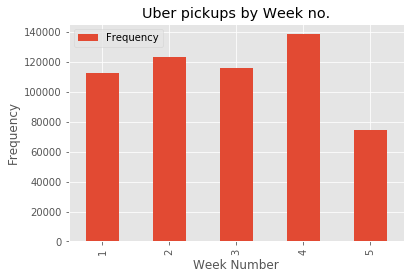

In [135]:
week_no.plot.bar()
plt.title('Uber pickups by Week no.')
plt.xlabel('Week Number')
plt.ylabel('Frequency')
plt.show()

### 3) Hour-wise Analysis 

In [139]:
hour=df_apr.groupby('hour').count()

In [141]:
hour=pd.DataFrame(hour['Lat'])
hour.columns=['Frequency']
hour

,Frequency
hour,
0,11910
1,7769
2,4935
3,5040
4,6095
5,9476
6,18498
7,24924
8,22843


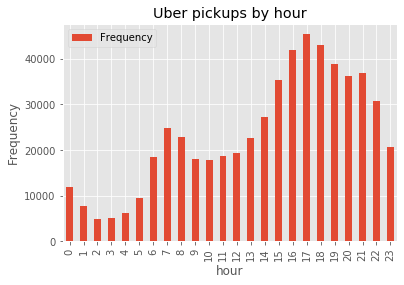

In [145]:
hour.plot.bar()
plt.ylabel('Frequency')
plt.title('Uber pickups by hour')
plt.show()

Uber pickups tend to be maximum around 5-6 pm, when the work-day for most poeple ends. This trend can vary for weekends, thus separately checking for weekdays and weekends

For Weekends:

In [168]:
weekend=df_apr[(df_apr['weekday']=='Sunday') | (df_apr['weekday']=='Saturday')]

In [173]:
weekend=weekend.groupby('hour').count()
weekend=pd.DataFrame(weekend['Lat'])
weekend.columns=['Frequency']

In [174]:
weekend

,Frequency
hour,
0,7569
1,5415
2,3167
3,2065
4,1391
5,1297
6,1513
7,1983
8,2605


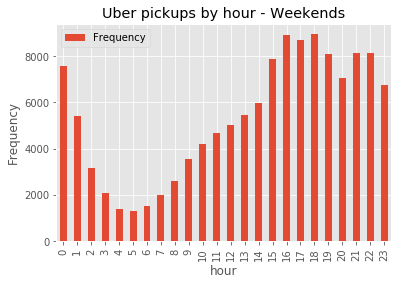

In [175]:
weekend.plot.bar()
plt.ylabel('Frequency')
plt.title('Uber pickups by hour - Weekends')
plt.show()

For Weekdays:

In [176]:
weekday=df_apr[(df_apr['weekday']!='Sunday') & (df_apr['weekday']!='Saturday')]

In [177]:
weekday=weekday.groupby('hour').count()
weekday=pd.DataFrame(weekday['Lat'])
weekday.columns=['Frequency']

In [178]:
weekday

,Frequency
hour,
0,4341
1,2354
2,1768
3,2975
4,4704
5,8179
6,16985
7,22941
8,20238


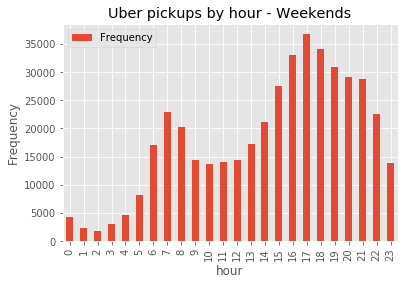

In [179]:
weekday.plot.bar()
plt.ylabel('Frequency')
plt.title('Uber pickups by hour - Weekends')
plt.show()

The following trends can be observed from the 2 graphs for weekdays and weekends:

    1. High pickups from 16:00 - 18:00 on weekdays are observed, which can be attributed to the general 9 am - 5pm workdays
    
    2. Late night pickups are much higher for weekends than for weekdays
    
    3. Early morning pickups i.e. from 6 am to 9 am are comparitively higher for weekdays than weekends

### 4) Analysis by Minutes

In [180]:
minute=df_apr.groupby('min').count()

In [181]:
minute=pd.DataFrame(minute['Lat'])
minute.columns=['Frequency']
minute

,Frequency
min,
0,9451
1,9358
2,9434
3,9243
4,9247
5,9486
6,9407
7,9409
8,9612


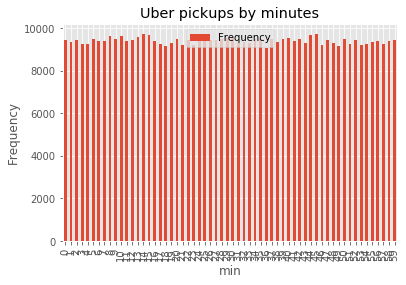

In [183]:
minute.plot.bar()
plt.ylabel('Frequency')
plt.title('Uber pickups by minutes')
plt.show()

Thus, pickups do not depend on minutes.